In [52]:
import os
import glob
import codecs
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from scipy import stats
from scipy import interpolate
import matplotlib.pyplot as plt




Questionnaire results


,experiment_date,trial_count,image,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,0713,1,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,0713,2,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,0713,3,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,0713,4,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,0713,5,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,0713,6,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,0713,7,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,0713,8,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,0713,9,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,0713,10,0713_10.jpg,4,4,4,4,4,4,4,4,4





Questionnaire contents


,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,退屈な-面白い,嫌い-好き,不快-快,豊かでない-豊かである,ポジティブでない-ポジティブである,暗い-明るい,弱々しい-力強い,平凡な-独創的な,理性的な-感情的な





Oxy-Hb data


,experiment_date,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
0,0713,0.000,0,,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0713,0.150,0,,-0.010916,0.003867,0.006667,0.003237,0.002989,0.004922,...,0.008919,0.003507,0.005177,0.002709,0.007292,0.003441,0.003417,0.008807,0.006464,0.002820
2,0713,0.300,0,,0.001431,0.003377,0.007147,0.003741,0.002111,0.003658,...,0.010347,0.002795,0.005039,0.005042,0.006374,0.002175,0.002802,0.010716,0.006633,0.002474
3,0713,0.450,0,,-0.002045,0.001742,0.004772,0.002395,-0.003275,0.000927,...,0.006198,0.000844,0.003133,0.001365,0.002798,0.000594,0.000109,0.007197,0.003833,-0.000237
4,0713,0.600,0,,0.001474,0.000238,0.000823,-0.000762,-0.005549,-0.002680,...,0.000255,-0.001728,-0.001860,0.001166,-0.001348,-0.001288,-0.002298,0.002399,-0.000579,-0.002828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11582,0713,1737.300,10,questionnaire,-0.071698,-0.058509,-0.042237,0.033209,-0.065773,0.063947,...,-0.037005,-0.027884,0.006887,-0.015162,-0.029784,-0.028576,-0.009314,-0.061780,-0.001060,0.070055
11583,0713,1737.450,10,questionnaire,-0.064951,-0.058814,-0.042617,0.030935,-0.067479,0.064016,...,-0.040981,-0.027485,0.007266,-0.015991,-0.031610,-0.030835,-0.010556,-0.059402,-0.003844,0.067960
11584,0713,1737.600,10,questionnaire,-0.066047,-0.060842,-0.045839,0.026885,-0.071183,0.065581,...,-0.047664,-0.030606,0.004814,-0.017076,-0.035312,-0.032719,-0.011985,-0.054567,-0.009187,0.066070
11585,0713,1737.750,10,questionnaire,-0.073903,-0.063848,-0.049477,0.024036,-0.073848,0.067346,...,-0.053574,-0.032306,0.001804,-0.023427,-0.040371,-0.037321,-0.015537,-0.048710,-0.014751,0.063313


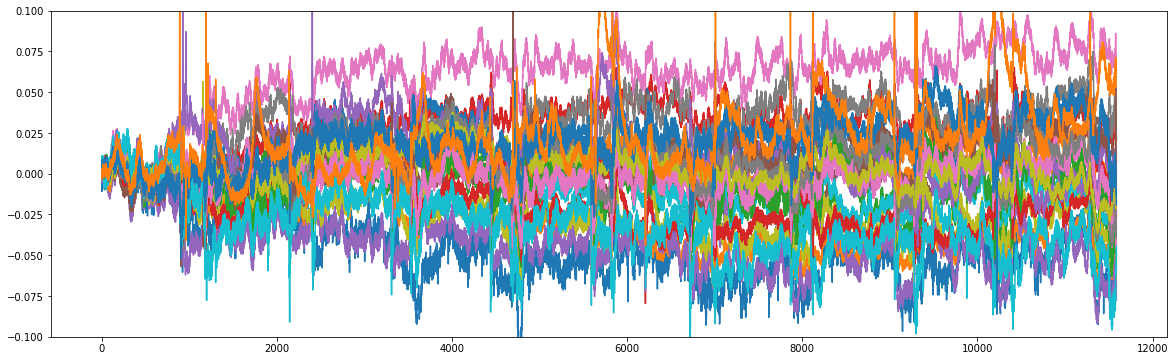

oxy_values -> (22, 11587)
frequency -> 0.052083333333333336
period -> 19.2


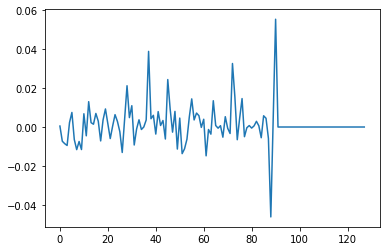

frequency -> 0.026041666666666668
period -> 38.4


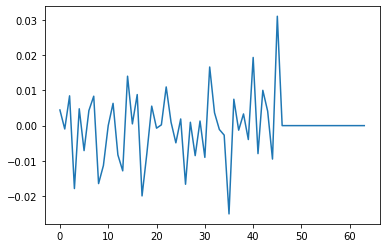

frequency -> 0.013020833333333334
period -> 76.8


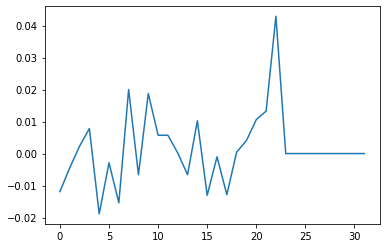

frequency -> 0.006510416666666667
period -> 153.6


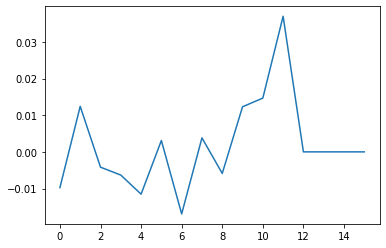

(22, 16384)



Denoised Oxy-Hb data


,experiment_date,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
363,0713,54.450,1,task,-0.779343,-0.905547,-0.485703,-0.43249,-1.31232,-0.269474,...,-1.25774,0.111,0.483502,-0.533281,-0.837982,-0.742681,-0.410968,-1.12334,-0.878816,0.356724
364,0713,54.600,1,task,-0.776564,-0.907558,-0.487573,-0.431631,-1.31413,-0.269846,...,-1.25342,0.112421,0.48257,-0.530402,-0.835923,-0.741315,-0.408361,-1.11779,-0.875505,0.356545
365,0713,54.750,1,task,-0.773785,-0.909569,-0.489443,-0.430772,-1.31595,-0.270219,...,-1.2491,0.113842,0.481637,-0.527523,-0.833865,-0.739948,-0.405754,-1.11225,-0.872194,0.356365
366,0713,54.900,1,task,-0.771006,-0.911579,-0.491313,-0.429913,-1.31776,-0.270592,...,-1.24478,0.115263,0.480704,-0.524645,-0.831806,-0.738582,-0.403148,-1.1067,-0.868882,0.356186
367,0713,55.050,1,task,-0.768227,-0.91359,-0.493184,-0.429054,-1.31958,-0.270964,...,-1.24046,0.116684,0.479771,-0.521766,-0.829748,-0.737215,-0.400541,-1.10116,-0.865571,0.356006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11582,0713,1737.300,10,questionnaire,5.4162,7.7655,4.03608,-3.61868,5.92054,-3.64363,...,3.19733,1.53915,-0.642494,-1.41871,2.03766,1.9127,2.32936,6.13513,-1.74202,-3.56527
11583,0713,1737.450,10,questionnaire,5.44362,7.81132,4.06443,-3.63714,5.95577,-3.66395,...,3.22489,1.55791,-0.644896,-1.41494,2.06596,1.92807,2.34426,6.17668,-1.74056,-3.58266
11584,0713,1737.600,10,questionnaire,5.47105,7.85714,4.09278,-3.65561,5.991,-3.68427,...,3.25245,1.57666,-0.647298,-1.41118,2.09427,1.94344,2.35915,6.21823,-1.7391,-3.60005
11585,0713,1737.750,10,questionnaire,5.49847,7.90296,4.12113,-3.67407,6.02622,-3.7046,...,3.28001,1.59541,-0.649701,-1.40742,2.12258,1.95881,2.37405,6.25978,-1.73764,-3.61744


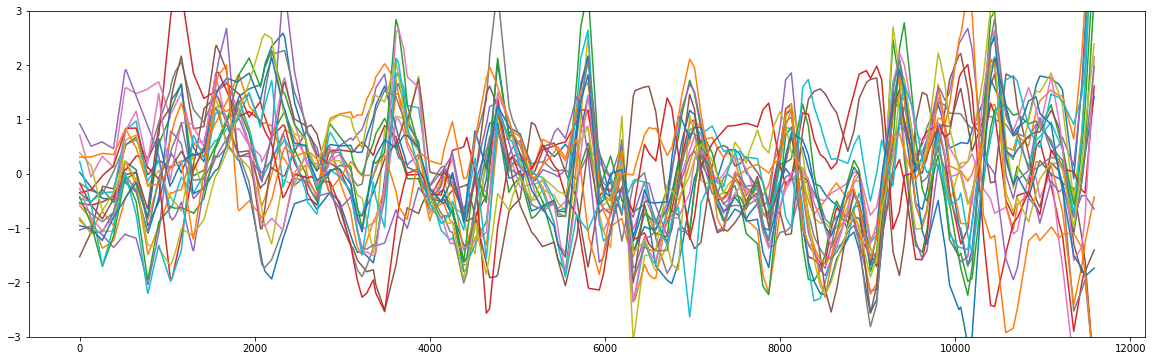




Trial count -> 1


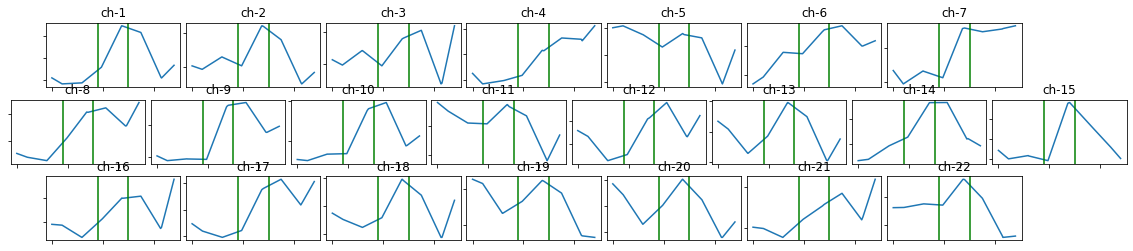

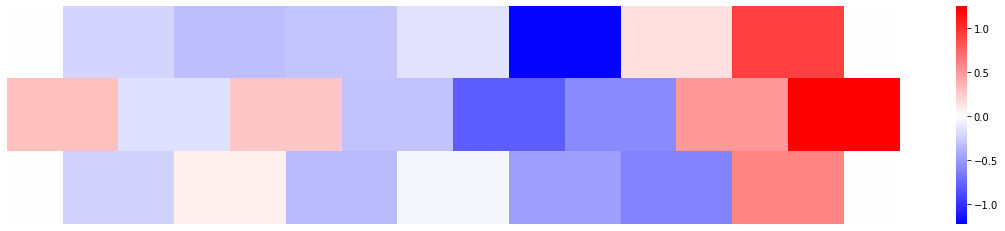




Trial count -> 2


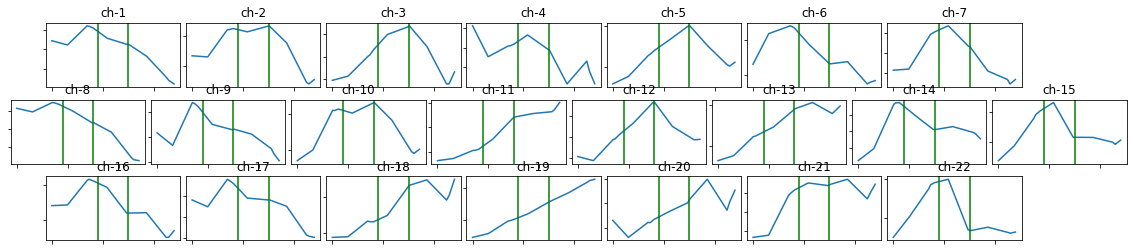

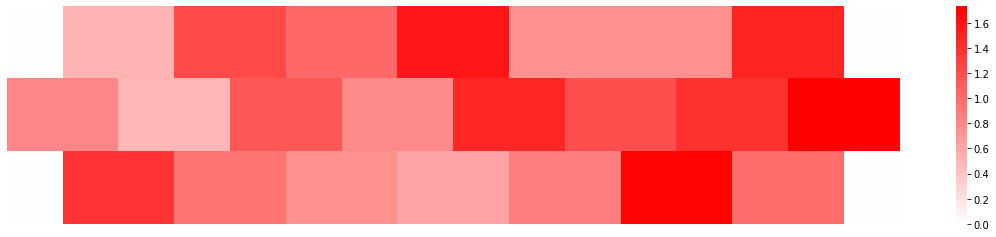




Trial count -> 3


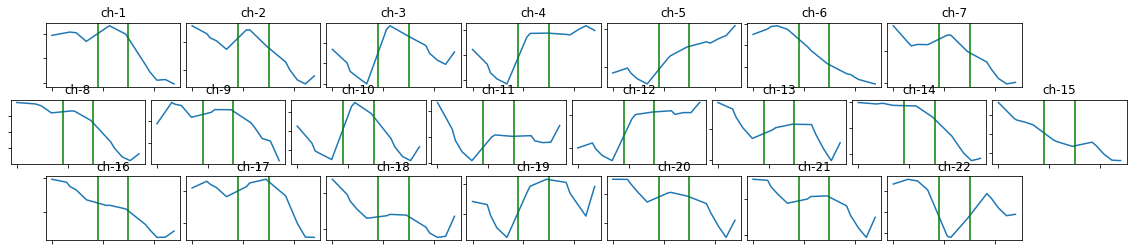

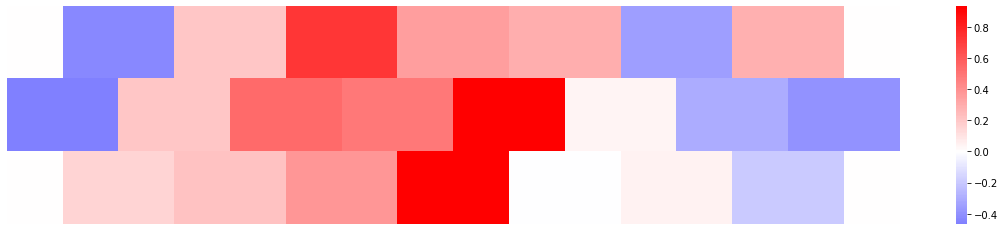




Trial count -> 4


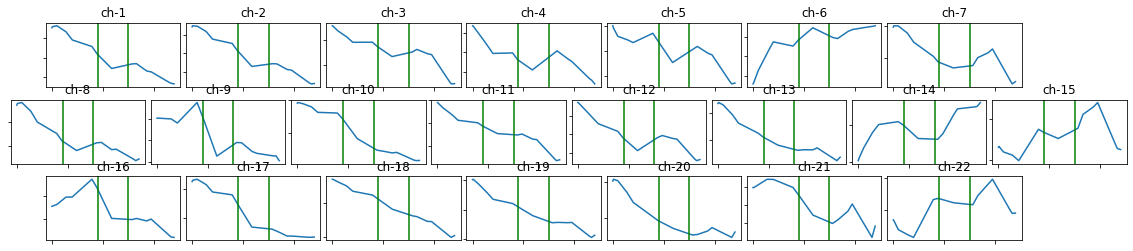

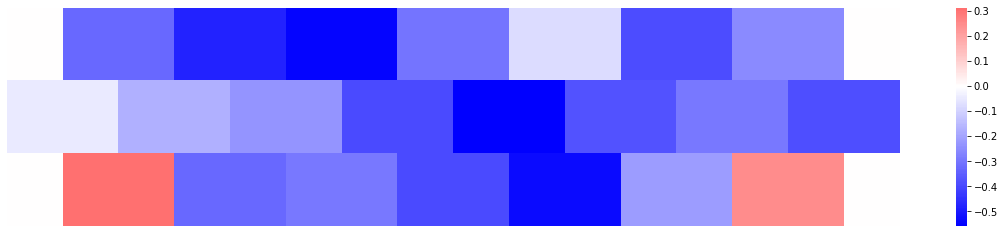




Trial count -> 5


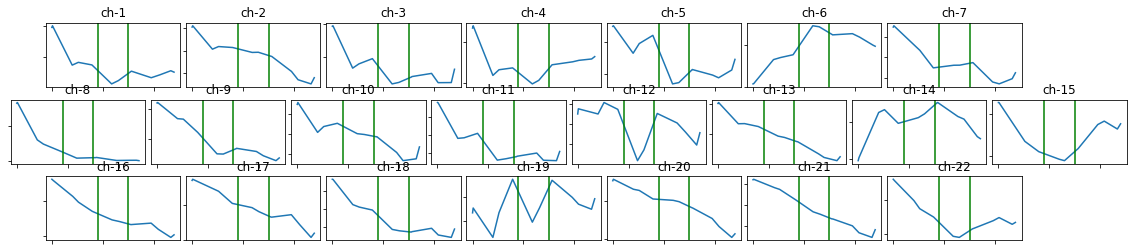

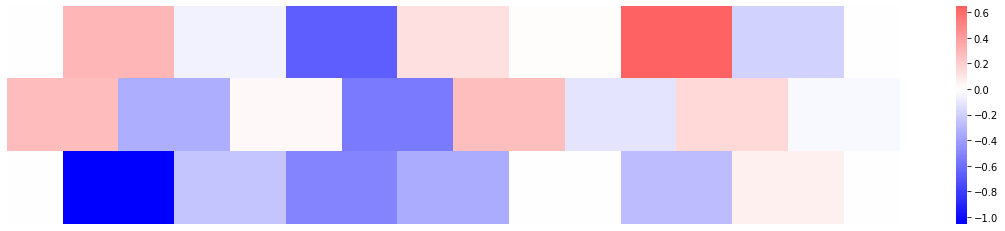




Trial count -> 6


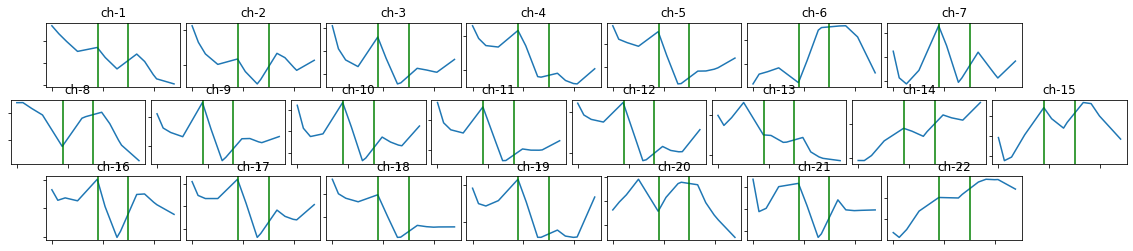

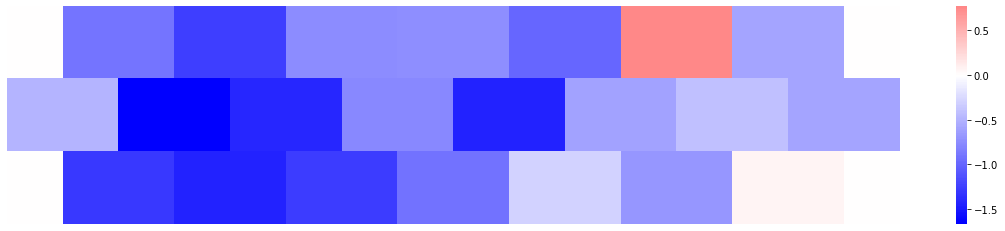




Trial count -> 7


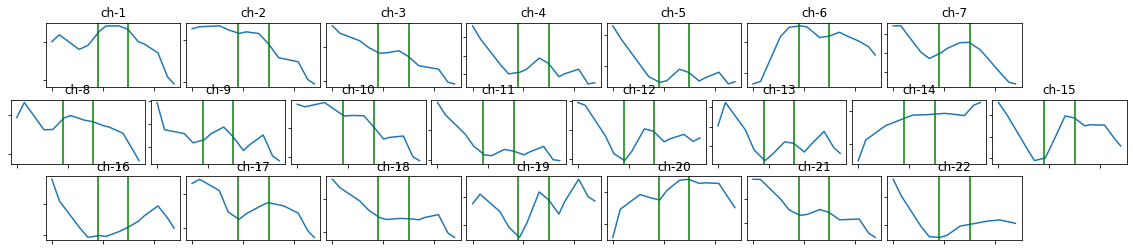

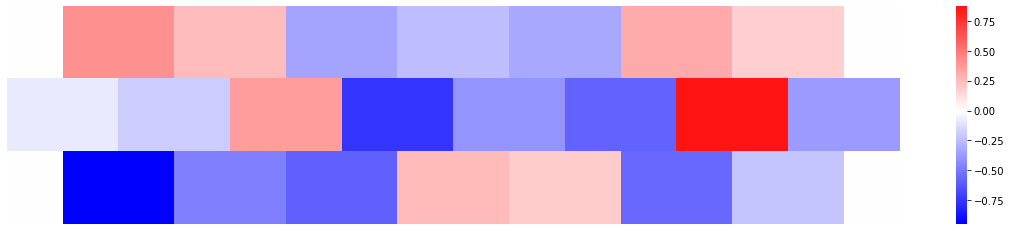




Trial count -> 8


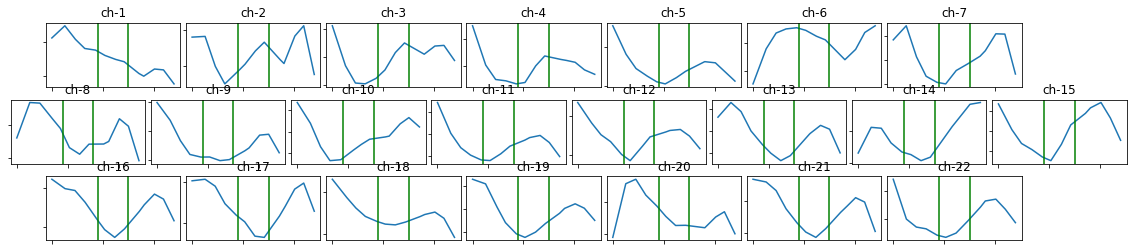

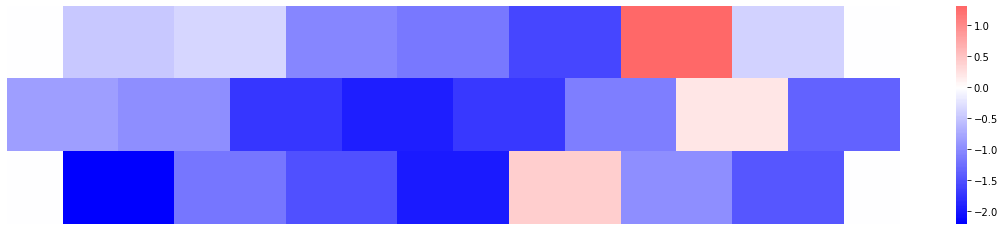




Trial count -> 9


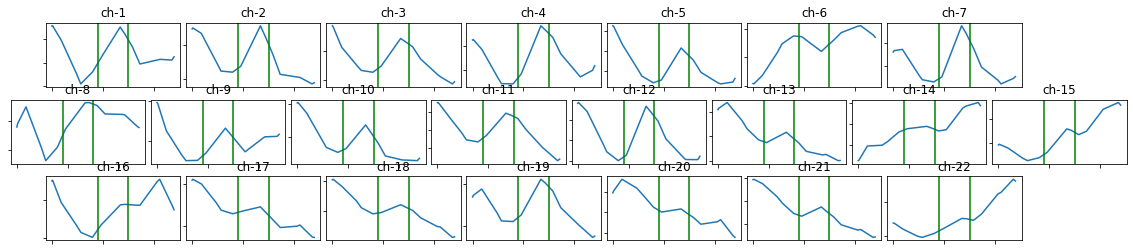

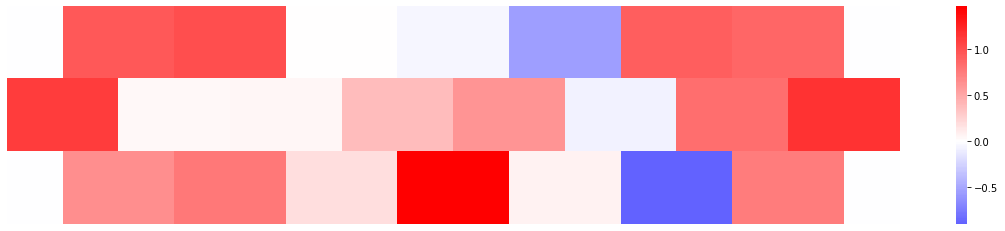




Trial count -> 10


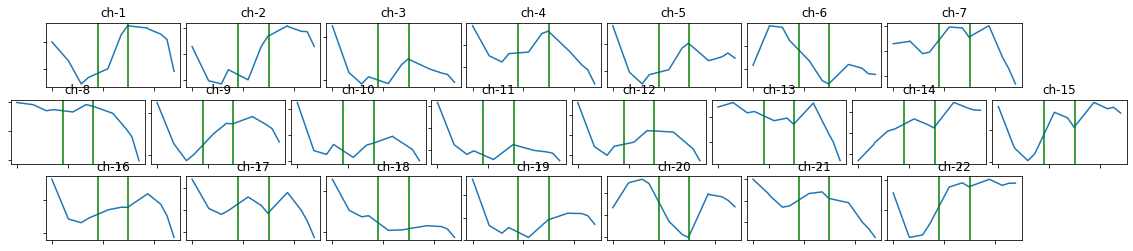

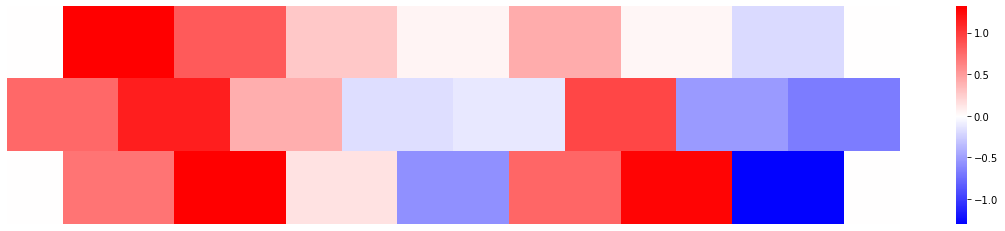




Z-normalized Oxy-Hb data


,experiment_date,time,trial_count,trial_category,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,...,ch-13,ch-14,ch-15,ch-16,ch-17,ch-18,ch-19,ch-20,ch-21,ch-22
0,0713,54.450,1,task,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0713,54.600,1,task,0.00277888,-0.00201077,-0.00187027,0.000859106,-0.00181487,-0.000372639,...,0.00432083,0.00142099,-0.000932722,0.00287872,0.00205858,0.00136655,0.00260662,0.00554513,0.00331127,-0.000179506
2,0713,54.750,1,task,0.00555777,-0.00402155,-0.00374054,0.00171821,-0.00362975,-0.000745277,...,0.00864166,0.00284198,-0.00186544,0.00575744,0.00411715,0.0027331,0.00521323,0.0110903,0.00662253,-0.000359013
3,0713,54.900,1,task,0.00833665,-0.00603232,-0.0056108,0.00257732,-0.00544462,-0.00111792,...,0.0129625,0.00426296,-0.00279816,0.00863616,0.00617573,0.00409964,0.00781985,0.0166354,0.0099338,-0.000538519
4,0713,55.050,1,task,0.0111155,-0.00804309,-0.00748107,0.00343643,-0.00725949,-0.00149055,...,0.0172833,0.00568395,-0.00373089,0.0115149,0.00823431,0.00546619,0.0104265,0.0221805,0.0132451,-0.000718026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0713,1644.750,10,task,0.872747,0.731285,0.995291,0.973151,1.06381,-1.42565,...,-0.165227,-0.174007,0.197935,0.203533,-0.424168,-0.287446,0.562813,-0.803193,0.0720383,0.65048
1996,0713,1644.900,10,task,0.872427,0.732855,0.99193,0.966598,1.05893,-1.41932,...,-0.161953,-0.164812,0.203905,0.206648,-0.41686,-0.286235,0.565139,-0.795546,0.0704662,0.652372
1997,0713,1645.050,10,task,0.872106,0.734425,0.988568,0.960045,1.05406,-1.41299,...,-0.15868,-0.155616,0.209875,0.209764,-0.409553,-0.285023,0.567465,-0.7879,0.0688942,0.654265
1998,0713,1645.200,10,task,0.871786,0.735995,0.985207,0.953493,1.04919,-1.40666,...,-0.155406,-0.14642,0.215845,0.212879,-0.402245,-0.283811,0.569792,-0.780254,0.0673222,0.656158





Oxy-Hb mean with questionnaire results


,trial_count,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,ch-8,ch-9,...,image,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,0.570335,0.586769,0.193744,0.295749,0.090276,0.425499,0.768723,0.351426,0.916233,...,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,2,-0.418215,0.005356,0.251772,-0.000415,0.271562,-0.464888,-0.104175,-0.449742,-0.481020,...,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,3,0.065535,0.053330,0.460151,0.388874,0.379149,-0.624105,-0.069687,-0.083423,0.078122,...,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,4,-0.500514,-0.594236,-0.256510,-0.101652,-0.256119,0.179259,-0.119500,-0.233324,-1.257536,...,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,5,-0.254844,-0.140908,-0.374476,-0.127095,-0.377318,0.691282,0.042539,-0.257747,-0.373971,...,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,6,-0.594034,-0.411667,-1.321800,-0.879696,-1.500611,1.481528,-0.698769,0.720783,-2.620638,...,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,7,0.157147,-0.068607,-0.006974,0.210814,0.210676,-0.198677,0.201598,0.016616,0.161559,...,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,8,-0.201655,0.228755,0.678001,0.525908,0.210060,-0.236020,0.091999,-0.209836,-0.059568,...,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,9,0.457290,0.682263,1.188708,1.264790,0.926533,-0.555156,0.659001,0.364263,0.805511,...,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,10,0.371567,0.231407,0.300617,0.415639,0.457415,-0.764599,0.368695,0.073721,0.660898,...,0713_10.jpg,4,4,4,4,4,4,4,4,4





Correlations between questionnaire results and Oxy-Hb mean values


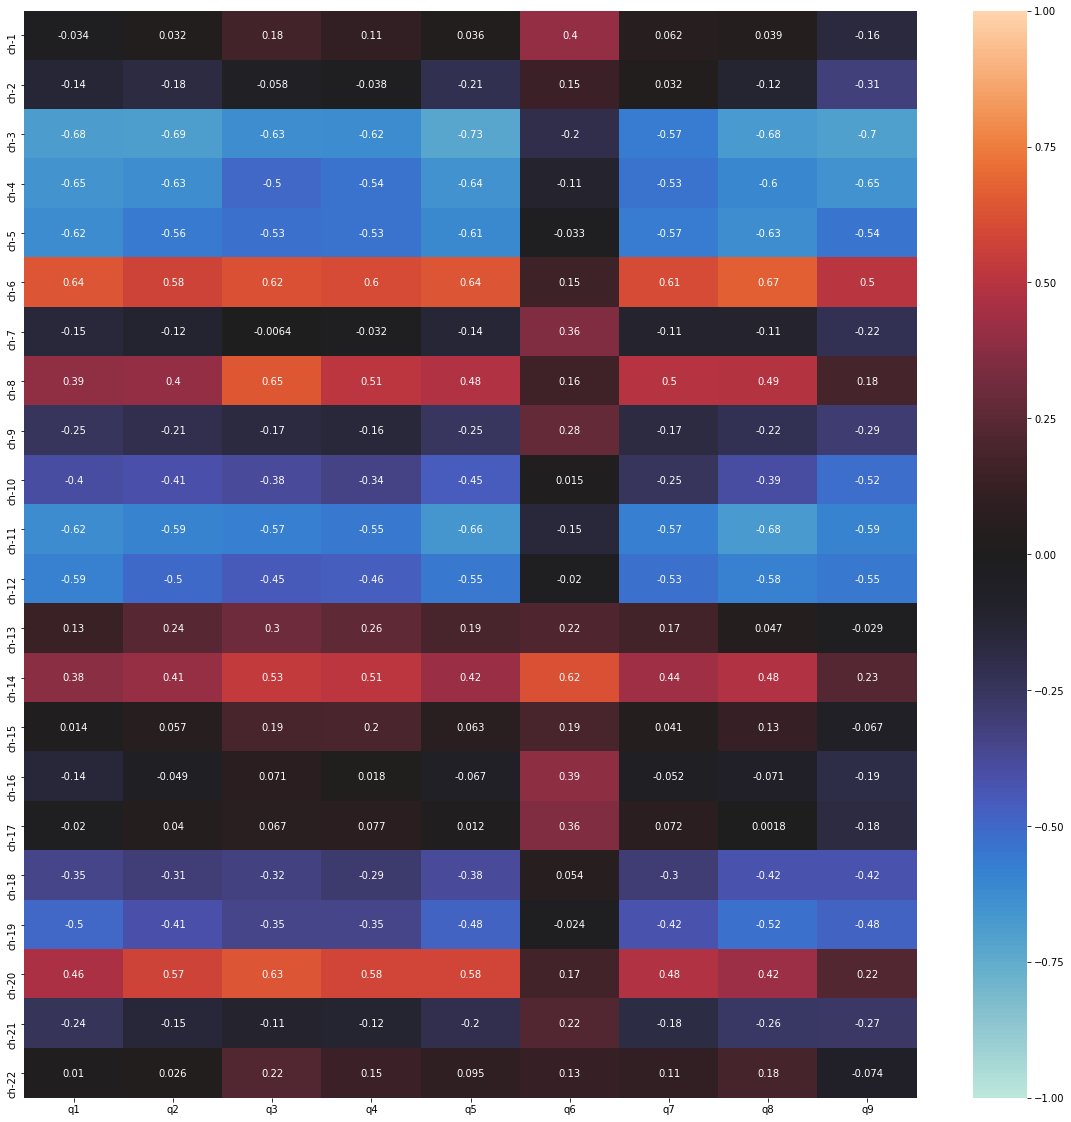




Oxy-Hb variations(task start - task end) with questionnaire results


,trial_count,ch-1,ch-2,ch-3,ch-4,ch-5,ch-6,ch-7,ch-8,ch-9,...,image,q1,q2,q3,q4,q5,q6,q7,q8,q9
0,1,0.952765,0.996468,0.423114,0.577476,0.169583,0.845557,1.393459,0.604667,1.712988,...,0713_1.jpg,5,5,5,5,5,4,5,5,3
1,2,-0.674277,0.122527,0.410102,-0.110778,0.535197,-0.886911,-0.427081,-0.906991,-0.673414,...,0713_2.jpg,3,3,3,3,3,3,3,2,3
2,3,-0.089001,-0.347451,0.387825,0.469203,0.615250,-1.186480,-0.418173,-0.343994,0.070916,...,0713_3.jpg,2,2,3,2,3,3,3,2,1
3,4,-0.524609,-0.692352,-0.236507,0.077649,-0.192464,0.096893,-0.115824,-0.123733,-1.284460,...,0713_4.jpg,2,2,3,2,3,3,2,2,2
4,5,-0.101124,-0.291419,-0.367930,0.100141,-0.361258,0.650395,0.093397,-0.318103,-0.382384,...,0713_5.jpg,4,4,4,4,4,4,4,4,4
5,6,-0.563601,-0.210966,-1.639179,-1.292236,-1.953398,2.276028,-0.798423,1.148750,-3.162693,...,0713_6.jpg,5,5,5,5,5,3,5,5,4
6,7,0.094309,-0.500591,-0.239285,0.237095,0.299645,-0.324976,0.289876,-0.067395,0.067141,...,0713_7.jpg,3,4,4,4,4,3,3,3,3
7,8,-0.403931,0.342907,1.117262,1.014274,0.651504,-0.558514,0.208048,-0.163868,-0.011149,...,0713_8.jpg,2,1,2,2,2,2,3,2,1
8,9,0.508216,0.720978,1.657557,1.825057,1.249880,-0.543917,0.851868,0.535199,0.930655,...,0713_9.jpg,1,1,3,2,2,3,2,1,1
9,10,0.871465,0.737565,0.981846,0.946940,1.044314,-1.400325,0.128212,0.156648,1.022789,...,0713_10.jpg,4,4,4,4,4,4,4,4,4





Correlations between questionnaire results and Oxy-Hb variations(task start - task end)


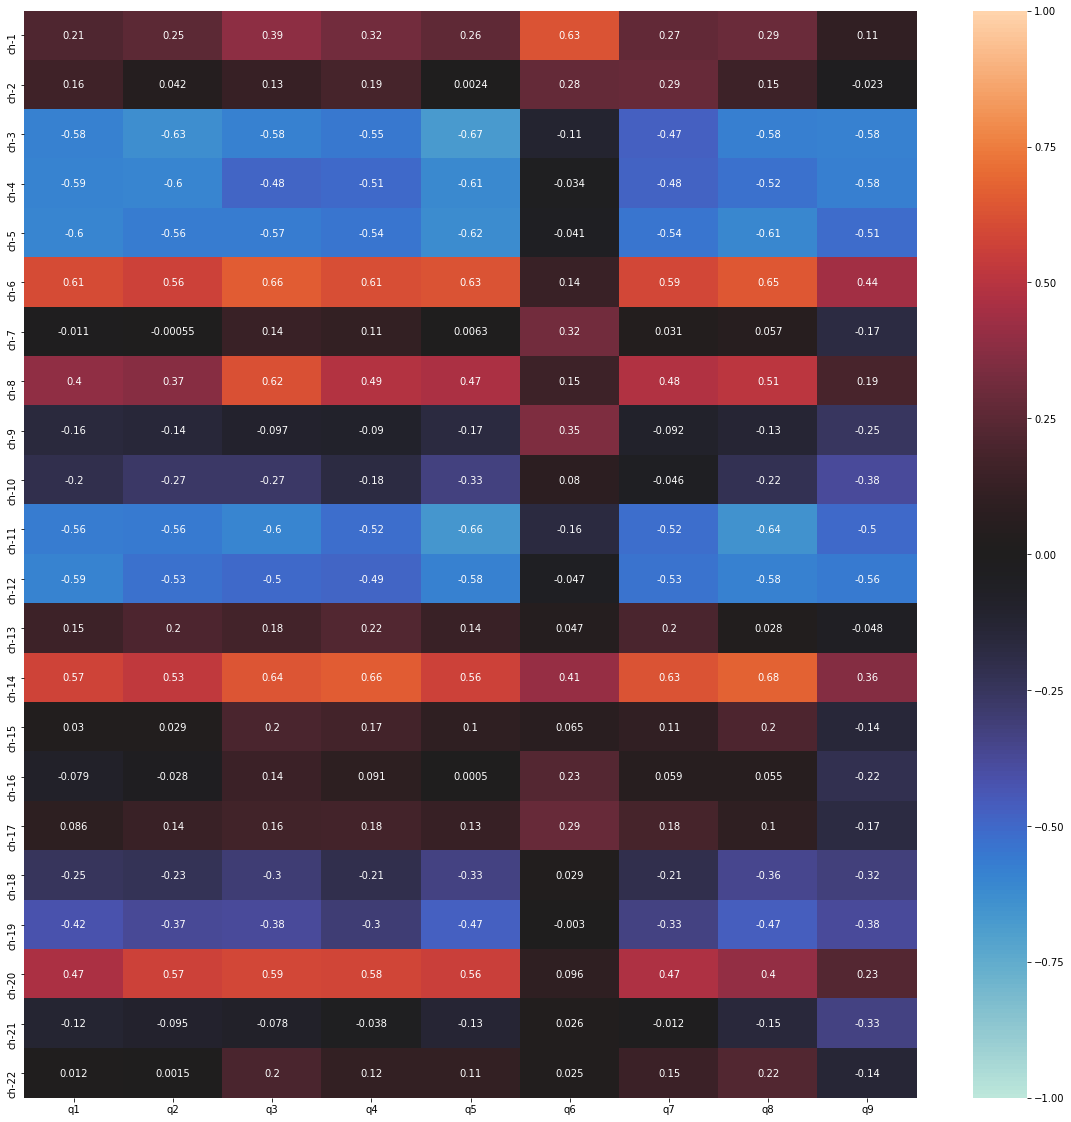

In [71]:
# define constants.
measurement_period = 0.15     # [sec]
preceding_rest_duration = 45  # [sec]
task_duration = 30            # [sec]
following_rest_duration = 45  # [sec]
num_preceding_rest_samples = int(preceding_rest_duration/measurement_period)
num_task_samples = int(task_duration/measurement_period)
num_following_rest_samples = int(following_rest_duration/measurement_period)
num_trial_samples = num_preceding_rest_samples + num_task_samples + num_following_rest_samples
num_columns = 70
separation_char = '\t'
data_table_start_row_index = 33
num_channels = 22
nirs_data_filepath = './experimental_data/nirs/0713-main.TXT'
questionnaire_data_filepath = './experimental_data/questionnaire/0713.csv'
experiment_date = os.path.splitext(os.path.basename(nirs_data_filepath))[0].split('-')[0]

# load nirs data and make (temporary) dataframe object
temporary_names = np.arange(num_columns).astype(str)
temporary_df = pd.read_csv(
    nirs_data_filepath, 
    names=temporary_names, 
    sep=separation_char, 
    low_memory=False
)

# load questionnare data and create dataframe object
questionnaire_result_df = pd.read_csv(
    questionnaire_data_filepath, 
    index_col=0, 
)
questionnaire_contents = questionnaire_result_df.columns.values[1:]
questionnaire_result_df.insert(0, 'trial_count', (np.arange(len(questionnaire_result_df))+1).astype(str))
questionnaire_result_df.insert(0, 'experiment_date', (np.full(len(questionnaire_result_df), experiment_date)))
questionnaire_ids = ['q{}'.format(i+1) for i in range(questionnaire_contents.shape[0])]
mapper = {}
for questionnaire_content, questionnaire_id in zip(questionnaire_contents, questionnaire_ids):
    mapper[questionnaire_content] = questionnaire_id
questionnaire_result_df = questionnaire_result_df.rename(columns=mapper)
questionnaire_content_df = pd.DataFrame(
    np.expand_dims(questionnaire_contents, axis=0), 
    columns=questionnaire_ids
)
print('\n\n\nQuestionnaire results')
display(questionnaire_result_df)
print('\n\n\nQuestionnaire contents')
display(questionnaire_content_df)

# create dataframe object that contains oxy-hb data
oxy_data = temporary_df[[temporary_names[0], temporary_names[2], *temporary_names[4::3]]][data_table_start_row_index:].values
channel_names = [label.replace(' ', '') for label in oxy_data[0][2:]]
oxy_df_column_labels = [*oxy_data[1][:2], *channel_names]
oxy_df = pd.DataFrame(
    oxy_data[2:],
    columns=oxy_df_column_labels
)
cast_dict = {}
for channel_name in channel_names:
    cast_dict[channel_name] = float
oxy_df = oxy_df.astype(cast_dict)
# find valid marker indexes
finding_marker_query_statement = 'Mark !=0 and Mark !="0"'
marker_indexes = oxy_df.query(finding_marker_query_statement).index.values
marker_differences = marker_indexes[1:] - marker_indexes[:-1]
valid_marker_boolean_indexes = [*(marker_differences > num_trial_samples), True]
marker_indexes = marker_indexes[valid_marker_boolean_indexes]
num_trials = marker_indexes.shape[0]
# add two columns('trial_count', 'trial_category') to oxy_df
# with this operation, you can access data easily 
trial_counts = np.zeros(len(oxy_df))
trial_categories = np.full(len(oxy_df), '', dtype=object)
for i, marker_index in enumerate(marker_indexes):
    trial_counts[marker_index:] = i+1
    trial_categories[marker_index:marker_index+num_preceding_rest_samples] = 'preceding_rest'
    trial_categories[marker_index+num_preceding_rest_samples:marker_index+num_preceding_rest_samples+num_task_samples] = 'task'
    trial_categories[marker_index+num_preceding_rest_samples+num_task_samples:marker_index+num_preceding_rest_samples+num_task_samples+num_following_rest_samples] = 'following_rest'
    trial_categories[marker_index+num_preceding_rest_samples+num_task_samples+num_following_rest_samples:] = 'questionnaire'
oxy_df.insert(1, 'trial_count', trial_counts.astype(int))
oxy_df.insert(2, 'trial_category', trial_categories)
oxy_df = oxy_df.drop('Mark', axis=1)
oxy_df = oxy_df.rename(columns={'Time(sec)': 'time'})
oxy_df.insert(0, 'experiment_date', (np.full(len(oxy_df), experiment_date)))
print('\n\n\nOxy-Hb data')
display(oxy_df)
plt.figure(figsize=(20,6))
plt.plot(oxy_df[channel_names].values)
plt.ylim(-0.1, 0.1)
plt.show()

# denoise data using multi resolution analysis
# note that changing value of 'minimum_frequency' or 'maximum_frequency' will make changes in results
oxy_df_column_labels = oxy_df.columns.values
num_information_columns = 4
info_labels = oxy_df_column_labels[:num_information_columns]
oxy_value_labels = oxy_df_column_labels[num_information_columns:]
info_values = oxy_df[info_labels].values
oxy_values = oxy_df[oxy_value_labels].values.astype(float).T
print('oxy_values -> {}'.format(oxy_values.shape))
num_paddings = 2**14-oxy_values.shape[1]
wavelet_input = np.pad(oxy_values, [(0,0),(0,num_paddings)])
count = 0
period = 0.15  # [sec]
frequency = 1/period  # [Hz]
denoised_oxy_values = np.zeros(wavelet_input.shape)
resample_x = np.linspace(0, wavelet_input.shape[1], wavelet_input.shape[1])
minimum_frequency = 0.006  # [Hz]
maximum_frequency = 0.06   # [Hz]
while wavelet_input.shape[1] > 1:
    count += 1
    period *= 2
    frequency = 1/period
    wavelet_output = wavelet_input[:, 1::2] - wavelet_input[:, 0::2]
    wavelet_input = wavelet_input[:, 0::2] + (wavelet_input[:, 1::2] - wavelet_input[:, 0::2])/2
    if minimum_frequency < frequency and frequency < maximum_frequency:
        resampled_wavelet_output = np.zeros(denoised_oxy_values.shape)
        for i, wavelet_output_per_channel in enumerate(wavelet_output):
            x = np.linspace(0, resample_x.shape[0], wavelet_output_per_channel.shape[0])
            interpolated_wavelet_output_per_channel = interpolate.interp1d(x, wavelet_output_per_channel, kind='linear')
            resampled_wavelet_output[i] = interpolated_wavelet_output_per_channel(resample_x)
        denoised_oxy_values += resampled_wavelet_output
        print('frequency -> {}'.format(frequency))
        print('period -> {}'.format(period))
        plt.plot(wavelet_output[0])
        plt.show()
print(denoised_oxy_values.shape)
zscored_and_denoised_oxy_values = stats.zscore(denoised_oxy_values[:, :-num_paddings], axis=1, ddof=1)
denoised_oxy_values = np.hstack([info_values, zscored_and_denoised_oxy_values.T])
denoised_oxy_df = pd.DataFrame(
    denoised_oxy_values,
    columns=oxy_df_column_labels
)
print('\n\n\nDenoised Oxy-Hb data')
display(denoised_oxy_df[marker_indexes[0]+num_preceding_rest_samples:])
plt.figure(figsize=(20,6))
plt.plot(denoised_oxy_df[channel_names].values)
plt.ylim(-3, 3)
plt.show()

# for each trial, normalize task samples using rest samples and create dataframe.
normalized_task_samples_array = np.zeros([num_task_samples*num_trials, num_channels])
means_array = np.zeros([num_trials, num_channels])
variations_array = np.zeros([num_trials, num_channels])
means_list = []
variations_list = []
task_infomations_list = []
for trial_count in range(1, num_trials+1):
    query_statement = 'trial_count == {}'.format(trial_count)
    oxy_df_while_trial = denoised_oxy_df.query(query_statement)
    query_statement = 'trial_count == {} and trial_category == "preceding_rest"'.format(trial_count)
    oxy_df_while_preseding_rest = denoised_oxy_df.query(query_statement)
    query_statement = 'trial_count == {} and trial_category == "task"'.format(trial_count)
    oxy_df_while_task = denoised_oxy_df.query(query_statement)
    task_infomations = oxy_df_while_task[info_labels].values
    task_infomations_list.append(task_infomations)
    task_samples = oxy_df_while_task[oxy_value_labels].values.astype(float).T
    rest_samples = oxy_df_while_preseding_rest[oxy_value_labels].values.astype(float).T
    rest_sample_means = np.mean(rest_samples, axis=1)
    rest_sample_stds = np.std(rest_samples, axis=1)
    task_sample_means = np.mean(task_samples, axis=1)
    task_sample_stds = np.std(task_samples, axis=1)
    means = np.mean(denoised_oxy_df[oxy_value_labels].values.astype(float), axis=1)
    stds = np.std(denoised_oxy_df[oxy_value_labels].values.astype(float), axis=1)
    normalized_task_samples = np.zeros(task_samples.shape)
    for i in range(task_samples.shape[0]):
#         normalized_task_samples[i] = (task_samples[i]-means[i])/stds[i]
        normalized_task_samples[i] = task_samples[i]-task_samples[i, 0]
    normalized_task_samples_array[(trial_count-1)*200:trial_count*200, :] = normalized_task_samples.T
    means_array[(trial_count-1):trial_count, :] = np.mean(normalized_task_samples, axis=1)
    variations_array[(trial_count-1):trial_count, :] = normalized_task_samples[:, -1] - normalized_task_samples[:, 0]

    # visualize data
    print('\n\n\nTrial count -> {}'.format(trial_count))
    fig = plt.figure(figsize=(20,4))
    second_row_start_index = 7
    third_row_start_index = 15
    num_colspans = 4
    num_rows = 3
    num_columns = int(num_colspans*np.ceil(num_channels/num_rows))
    for i, channel_label in enumerate(oxy_value_labels):
        samples = oxy_df_while_trial[channel_label].values[:num_trial_samples]
        times = np.linspace(0, 120, samples.shape[0])
        if i < second_row_start_index :
            ax = plt.subplot2grid((num_rows, num_columns), (0, num_colspans*i+1), rowspan=1, colspan=num_colspans)
        elif second_row_start_index <= i and i <= 14:
            ax = plt.subplot2grid((num_rows, num_columns), (1, num_colspans*(i-second_row_start_index)), rowspan=1, colspan=num_colspans)
        elif third_row_start_index <= i:
            ax = plt.subplot2grid((num_rows, num_columns), (2, num_colspans*(i-third_row_start_index)+1), rowspan=1, colspan=num_colspans)
        ax.plot(times, samples)
        ax.axvline(x=times[num_preceding_rest_samples], color='green')
        ax.axvline(x=times[num_preceding_rest_samples+num_task_samples], color='green')
        ax.set_title(channel_label)
        ax.tick_params(
            labelbottom=False,
            labelleft=False,
            labelright=False,
            labeltop=False
        )
    plt.show()
    reshaped_means = np.zeros([3, 16])
    reshaped_means[0,1:15:2] = task_sample_means[:7]
    reshaped_means[0,2:16:2] = task_sample_means[:7]
    reshaped_means[1,0::2] = task_sample_means[7:15]
    reshaped_means[1,1::2] = task_sample_means[7:15]
    reshaped_means[2,1:15:2] = task_sample_means[15:]
    reshaped_means[2,2:16:2] = task_sample_means[15:]
    plt.figure(figsize=(20,4))
    plt.axis("off")
    sns.heatmap(reshaped_means, center=0, cmap='bwr')
    plt.show()


normalized_task_sample_df = pd.DataFrame(
    np.hstack([task_infomations_array, normalized_task_samples_array]),
    columns=oxy_df_column_labels
)
print('\n\n\nZ-normalized Oxy-Hb data')
display(normalized_task_sample_df)

# calculate correlations between questionnaire results and Oxy-Hb mean values
mean_df = pd.DataFrame(
    means_array,
    columns=oxy_value_labels
)
mean_df.insert(0, 'trial_count', (np.arange(len(questionnaire_result_df))+1).astype(str))
mean_with_questionnaire_result_df = pd.merge(mean_df, questionnaire_result_df, on='trial_count')
print('\n\n\nOxy-Hb mean with questionnaire results')
display(mean_with_questionnaire_result_df)
print('\n\n\nCorrelations between questionnaire results and Oxy-Hb mean values')
questionnaire_and_mean_correlations = mean_with_questionnaire_result_df.corr().loc[oxy_value_labels,questionnaire_ids]
plt.figure(figsize=(20,20))
sns.heatmap(questionnaire_and_mean_correlations, vmax=1, vmin=-1, center=0, annot=True)
plt.show()

# calculate correlation between questionnaire results and Oxy-Hb variations(task start - task end)
variation_df = pd.DataFrame(
    variations_array,
    columns=oxy_value_labels
)
variation_df.insert(0, 'trial_count', (np.arange(len(variation_df))+1).astype(str))
variation_with_questionnaire_result_df = pd.merge(variation_df, questionnaire_result_df, on='trial_count')
print('\n\n\nOxy-Hb variations(task start - task end) with questionnaire results')
display(variation_with_questionnaire_result_df)
print('\n\n\nCorrelations between questionnaire results and Oxy-Hb variations(task start - task end)')
questionnaire_and_variation_correlations = variation_with_questionnaire_result_df.corr().loc[oxy_value_labels,questionnaire_ids]
plt.figure(figsize=(20,20))
sns.heatmap(questionnaire_and_variation_correlations, vmax=1, vmin=-1, center=0, annot=True)
plt.show()
    